In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
real_state_details=pd.read_csv("data.csv")

In [122]:
real_state_details.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
real_state_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [7]:
real_state_details.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
real_state_details.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [32]:
#x = real_state_details.iloc[:, :-1].values
#y = real_state_details.iloc[:, -1].values

In [32]:
#from sklearn.model_selection import train_test_split
#X_train, X_test= train_test_split(real_state_details, test_size = 0.2, random_state = 34)

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for Xtrain_index, Xtest_index in split.split(real_state_details, real_state_details["CHAS"]):
    strat_train_set=real_state_details.loc[Xtrain_index]
    strat_test_set=real_state_details.loc[Xtest_index]

In [125]:
len(strat_train_set)

408

In [5]:
c_matrix=strat_train_set.corr()

In [55]:
c_matrix["MEDV"].sort_values(ascending=nding=False)

MEDV       1.000000
RM         0.611853
ZN         0.329917
DIS        0.161280
B          0.150601
CHAS       0.065555
LSTAT     -0.137020
CRIM      -0.342270
NOX       -0.349053
PTRATIO   -0.356919
RAD       -0.361266
AGE       -0.370037
INDUS     -0.384454
TAX       -0.423120
Name: MEDV, dtype: float64

In [56]:
import seaborn as sn

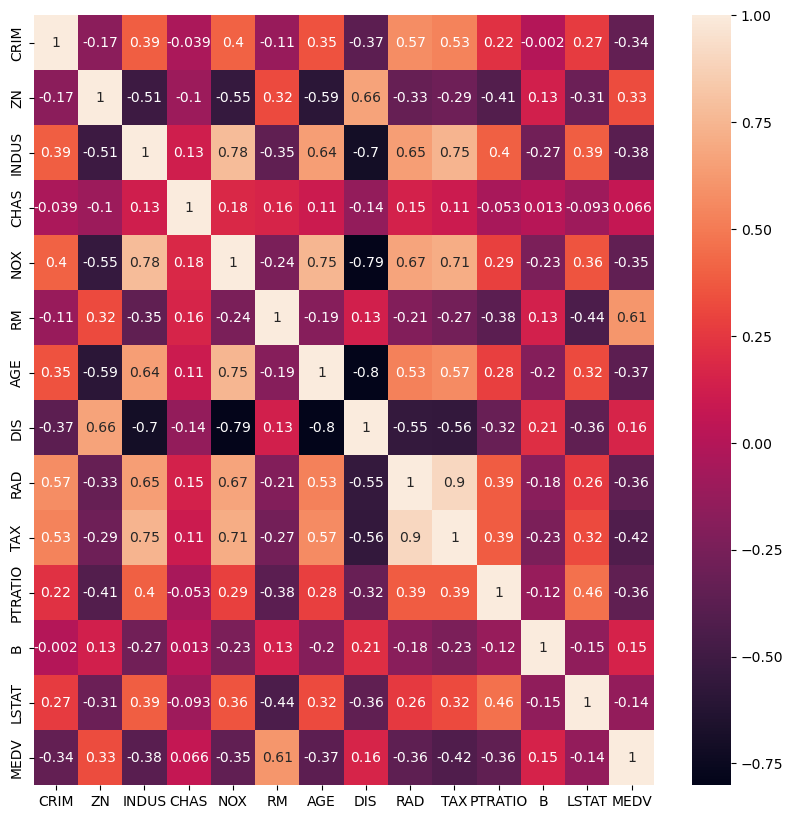

In [61]:
plt.figure(figsize=(10,10))
hm = sn.heatmap(data = c_matrix,annot=True)

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

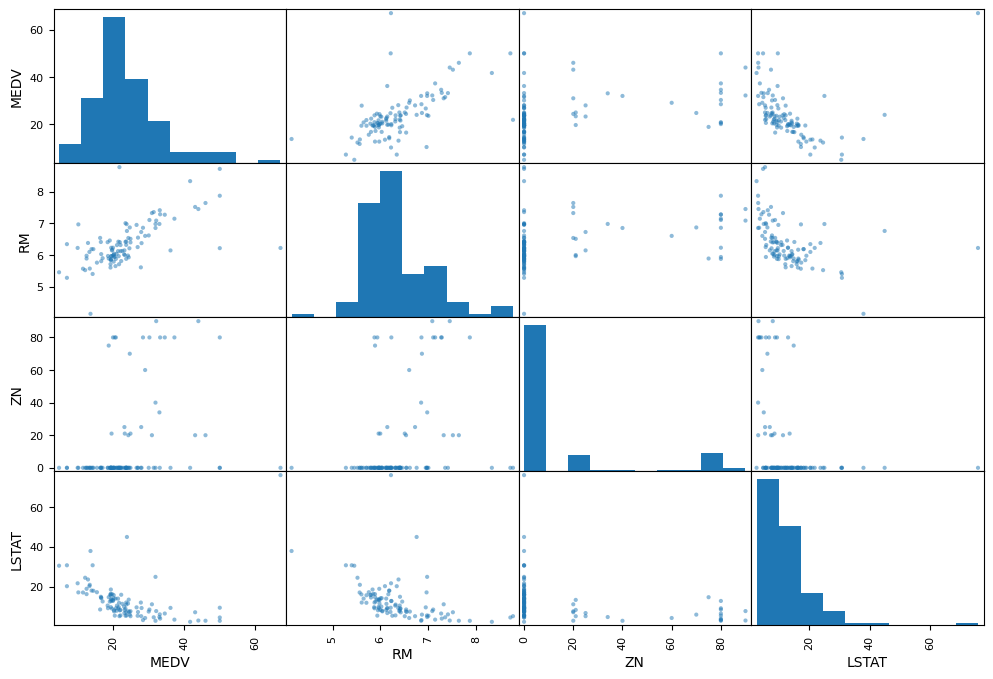

In [23]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(strat_train_set[attributes],figsize=(12,8))

In [7]:
#from sklearn.impute import SimpleImputer
#imputer =SimpleImputer(strategy ='median')
#imputer.fit(strat_train_set)

SimpleImputer(strategy='median')

In [8]:
#M=imputer.transform(strat_train_set)

In [10]:
#print(M)

[[2.17190e-01 0.00000e+00 1.05900e+01 ... 3.90940e+02 1.60300e+01
  2.24000e+01]
 [5.36000e-02 2.10000e+01 5.64000e+00 ... 3.96900e+02 5.28000e+00
  2.50000e+01]
 [5.08300e-02 0.00000e+00 5.19000e+00 ... 3.89710e+02 5.68000e+00
  2.22000e+01]
 ...
 [4.22239e+00 0.00000e+00 1.81000e+01 ... 3.53040e+02 1.46400e+01
  1.68000e+01]
 [9.60400e-02 4.00000e+01 6.41000e+00 ... 3.96900e+02 2.98000e+00
  3.20000e+01]
 [2.19770e-01 0.00000e+00 6.91000e+00 ... 3.96900e+02 1.62000e+01
  1.94000e+01]]


In [15]:
#M_data=pd.DataFrame(M,columns=strat_train_set.columns)
#M_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03,22.4
1,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
2,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68,22.2
3,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
4,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8.0,307.0,17.4,390.07,4.73,31.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3
99,0.07022,0.0,4.05,0.0,0.510,6.020,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2
100,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
101,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98,32.0


In [126]:
x = strat_train_set.iloc[:, :-1]
y = strat_train_set.iloc[:,-1]

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std_scaler",StandardScaler()),
])

In [132]:
real_state_pipeline=my_pipeline.fit_transform(x)

In [133]:
(real_state_pipeline).shape

(408, 13)

In [134]:
len(x)

408

In [169]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model.fit(real_state_pipeline,y)

DecisionTreeRegressor()

In [149]:
some_dataX=x.iloc[:5]
some_dataY=y[:5]

In [150]:
pre_data=my_pipeline.transform(some_dataX)

In [151]:

model.predict(pre_data)

array([16.88323294, 23.72555498, 12.99419684, 31.70857022, 24.92865062])

In [152]:
some_dataY

495    23.1
254    21.9
365    27.5
193    31.1
35     18.9
Name: MEDV, dtype: float64

In [153]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(real_state_pipeline)
lin_mse=mean_squared_error(y,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [154]:
lin_mse

25.653747676684862

In [155]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,real_state_pipeline,y,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [157]:
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[5.66658666 4.44508419 5.81280069 4.83395793 4.79407641 3.78038514
 8.94771005 4.60112855 3.85185723 5.19342927]
5.192701612438988
1.4035016858670384


In [160]:
from joblib import dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

In [170]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
pre_data1=my_pipeline.transform(X_test)
predict1=model.predict(pre_data1)
final_mse=mean_squared_error(Y_test,predict1)                         
final_rmse=np.sqrt(final_mse)

In [171]:
final_rmse

5.908353474251437